In [1]:
import pylab as plt
import numpy as np
from  scipy.interpolate import interp1d
%matplotlib inline

# Make plots to compare to RIKEN data shown at SMI2023


In [2]:
from RFCTool import *

In [3]:
RFS=RFCSettings(p=0.25*1e-3,N=2,Epush=1000,q=1,m=133,T=293,Vpp=400,Omega=8e6 *2*pi,mu=0.0018,yloss=-1 )

In [5]:
Drag=0.04  # Drag field, V/m
D=0.025    # Total carpet length, m

Pressures=[0.133,0.200,0.266]  # Pressures in bar
Colors=['red','darkorange','darkgoldenrod']

AllVs=[]
AllLosses=[]
DGamma=[]
Effic=[]

# Cs
#mu0=0.00182
#mI=133

# K
mu0=0.002126
mI=39

for P in Pressures:
    RFS.mu = mu0/P
    RFS.m  = mI
    RFCt=RFC(RFS)

    VMin =RFCt.VMin()
    Vs=np.linspace(VMin, 200, 100)
    Losses=[]
    for V in Vs:
        RFS.Vpp=V
        RFCt.Update(RFS)
        
        v=Drag*RFCt.mu
        Losses.append(RFCt.IonLossRate()/v)
    DGamma.append(D*np.maximum(np.array(Losses),1e-6*np.ones_like(Losses)))
    Effic.append(1/(DGamma[-1])*(1-np.exp(-DGamma[-1])))
    AllLosses.append(Losses)
    AllVs.append(Vs)

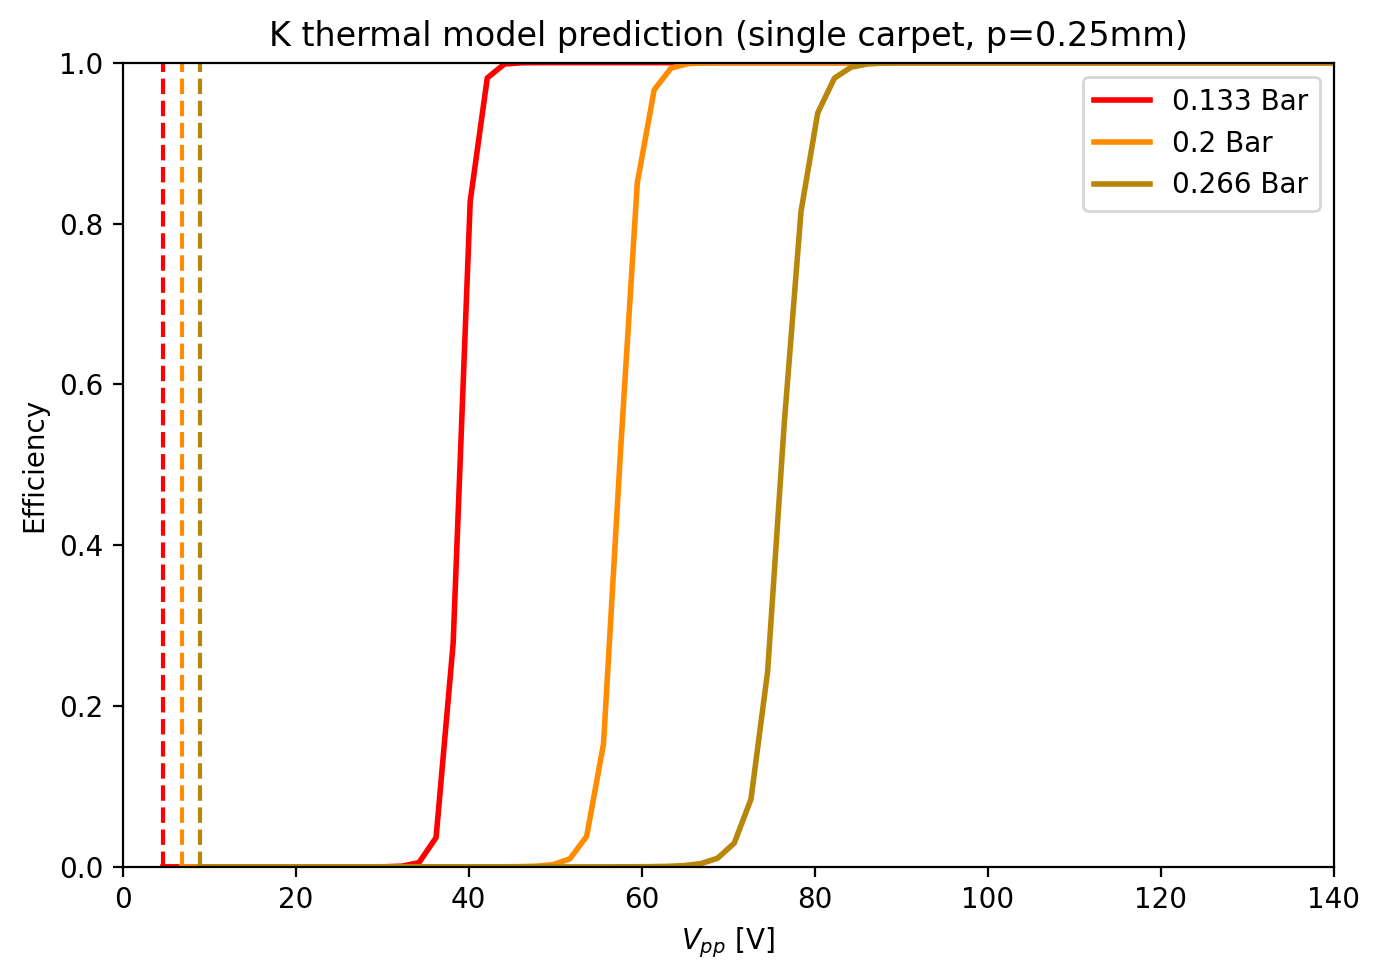

In [6]:
fig, ax1 = plt.subplots(figsize=(7,5),dpi=200)

for i in range(0,3):
    Gamma=np.array(AllLosses[i])
    plt.plot(AllVs[i], Effic[i],label=str(Pressures[i])+' Bar',color=Colors[i],linewidth=2)
    plt.plot([AllVs[i][0],AllVs[i][0]],[0,10],'--',color=Colors[i])
    

plt.ylabel(r"Efficiency")
plt.ylim(0,1)

plt.xlabel(r"$V_{pp}$ [V]")
plt.title(r"K thermal model prediction (single carpet, p=0.25mm)")
plt.xlim(0,140)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Plots/RikenPlot.png")